### Import modules

# Babymoons
#### Code Louisville Data Analysis 2 Project

In [62]:
import pandas as pd
import seaborn as sns
from datetime import datetime

## Feature 1: Loading Data
### Read at least two data files
3 csv files are used here

In [11]:
# Read in and inspect in Variables View

moon_df = pd.read_csv('full-moon-calendar-1900-2050/full_moon.csv')
births1_df = pd.read_csv('fivethirtyeight-births-dataset/US_births_1994-2003_CDC_NCHS.csv')
births2_df = pd.read_csv('fivethirtyeight-births-dataset/US_births_2000-2014_SSA.csv')

## Feature 2: Clean and operate on the data while combining them
### Clean Data
##### Check dataframes for null values

In [3]:
print(
    'births1_df nulls:\n', births1_df[births1_df.isna().any(axis=1)],
    '\n\nbirths2_df nulls:\n', births2_df[births2_df.isna().any(axis=1)],
    '\n\nmoon_df nulls:\n', moon_df[moon_df.isna().any(axis=1)]
)

births1_df nulls:
 Empty DataFrame
Columns: [year, month, date_of_month, day_of_week, births]
Index: [] 

births2_df nulls:
 Empty DataFrame
Columns: [year, month, date_of_month, day_of_week, births]
Index: [] 

moon_df nulls:
 Empty DataFrame
Columns: [Day,  Date,  Time]
Index: []


No null values found

##### Check data types and eliminate any extra whitespace

In [4]:
# Check data types

print(
    'births1_df dtypes:\n', births1_df.dtypes, 
    '\n\nbirths2_df dtypes:\n', births2_df.dtypes,
    '\n\nmoon_df dtypes:\n', moon_df.dtypes
)

births1_df dtypes:
 year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object 

births2_df dtypes:
 year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object 

moon_df dtypes:
 Day      object
 Date    object
 Time    object
dtype: object


In [5]:
# It looks there's some extra whitespace in the column names, let's check it out

print(
    'births1_df:\n', births1_df.columns,
    '\n\nbirths2_df:\n', births2_df.columns,
    '\n\nmoon_df:\n', moon_df.columns
)

births1_df:
 Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object') 

births2_df:
 Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object') 

moon_df:
 Index(['Day', ' Date', ' Time'], dtype='object')


In [16]:
# There's definitely leading whitespace in front of the moon_df column names - perform strip and view results

moon_df.columns = moon_df.columns.str.lstrip()

moon_df.columns

Index(['Day', 'Date', 'Time'], dtype='object')

In [7]:
# Remove any leading and trailing whitespace that might be present from the Day column in moon_df

moon_df['Day'].str.strip()

0          Monday
1       Wednesday
2          Friday
3          Sunday
4          Monday
          ...    
1863     Thursday
1864       Friday
1865       Sunday
1866       Monday
1867    Wednesday
Name: Day, Length: 1868, dtype: object

Everything looks as expected

##### Correct dates to YYYY-MM-DD format in all 3 datasets

In [31]:
# Start with moon_df, printing dtypes again to confirm successfully converted to datetime

moon_df['Date'] = pd.to_datetime(moon_df['Date'])

print(moon_df.dtypes, moon_df.head(), sep='\n\n')

Day             object
Date    datetime64[ns]
Time            object
dtype: object

         Day       Date          Time
0     Monday 1900-01-15   08:07:30 pm
1  Wednesday 1900-02-14   02:50:12 pm
2     Friday 1900-03-16   09:11:48 am
3     Sunday 1900-04-15   02:02:06 am
4     Monday 1900-05-14   04:36:36 pm


In [17]:
# Next do the birth datasets and check results

births1_df['Date'] = pd.to_datetime(births1_df.year.astype(str) + '-' + births1_df.month.astype(str) + '-' + births1_df.date_of_month.astype(str))

print(births1_df.head(3), births1_df.dtypes, sep='\n\n')

   year  month  date_of_month  day_of_week  births       Date
0  1994      1              1            6    8096 1994-01-01
1  1994      1              2            7    7772 1994-01-02
2  1994      1              3            1   10142 1994-01-03

year                      int64
month                     int64
date_of_month             int64
day_of_week               int64
births                    int64
Date             datetime64[ns]
dtype: object


In [18]:
births2_df['Date'] = pd.to_datetime(births2_df.year.astype(str) + '-' + births2_df.month.astype(str) + '-' + births2_df.date_of_month.astype(str))

print(births2_df.head(3), births2_df.dtypes, sep='\n\n')

   year  month  date_of_month  day_of_week  births       Date
0  2000      1              1            6    9083 2000-01-01
1  2000      1              2            7    8006 2000-01-02
2  2000      1              3            1   11363 2000-01-03

year                      int64
month                     int64
date_of_month             int64
day_of_week               int64
births                    int64
Date             datetime64[ns]
dtype: object


##### Combine birth datasets

In [19]:
# Combine birth data into one dataframe

births_df = pd.concat([births1_df, births2_df], ignore_index=True)

Looks good in Variables View

##### Drop duplicate dates since the datasets overlap from 2000-2003

In [20]:
# Check the starting number of rows

births_df.shape

(9131, 6)

In [21]:
# Drop rows that match on date and verify that rows have been dropped

births_df.drop_duplicates(subset=['Date'], keep='last', inplace=True)

births_df.shape

(7670, 6)

### Replace day of week numbers with names in birth dataset

- We may want to look at births on different days of the week as part of our analysis

In [22]:
# According to kaggle documentation, 1 is Monday and 7 is Sunday

day_names_dict = {
                    1: 'Monday',
                    2: 'Tuesday',
                    3: 'Wednesday',
                    4: 'Thursday',
                    5: 'Friday',
                    6: 'Saturday',
                    7: 'Sunday'
                    }

In [23]:
# Create series of day numbers from births_df

day_numbers = births_df['day_of_week']

In [24]:
# Create day names series using series.map()

day_names = day_numbers.map(day_names_dict)

In [40]:
# Adding day names series to births_df using same column name as moon_df

births_df['Day'] = day_names

## Create final dataset
### Perform a pandas merge

In [34]:
# Use Date columns to merge and keep everything in births_df, with only matching rows from moon_df

babymoons_df = pd.merge(births_df, moon_df, how = 'left', on = ['Date', 'Day'])

In [19]:
# Confirm that the number of rows equals that of births_df

babymoons_df.shape

(7670, 8)

Everything looks good in Variables View

### Drop unnecessary columns

In [35]:
babymoons_df.drop(['year', 'month', 'date_of_month', 'day_of_week'], axis=1, inplace=True)
babymoons_df.head()

,births,Date,Day,Time
0,8096,1994-01-01,Saturday,NaN
1,7772,1994-01-02,Sunday,NaN
2,10142,1994-01-03,Monday,NaN
3,11248,1994-01-04,Tuesday,NaN
4,11053,1994-01-05,Wednesday,NaN


### Indicate where full moons occur

- The Time column has been retained from moons_df, so any entry there that is not NaN represents a full moon
- We won't be using the times of the full moon, so we'll change the column to say "yes" or "no" for whether there was a full moon

In [36]:
# Fill in 'No' wherever NaN is present in Time column and confirm result

babymoons_df['Time'].fillna('No', inplace=True)

In [37]:
# Next, replace values in the Time column that don't say 'No' with 'Yes' and confirm result

babymoons_df.loc[babymoons_df['Time'] != 'No','Time']='Yes'

In [38]:
# Rename Time column (and capitalize births column for consistency)

babymoons_df.rename(columns= {'births':'Births', 'Time':'Full Moon'}, inplace=True)
babymoons_df.columns

Index(['Births', 'Date', 'Day', 'Full Moon'], dtype='object')

## Answering questions with the new dataset

We want to know if more babies are born on the full moon on average

In [70]:
# Start looking at descriptive statistics and group by presence or absence of full moon

babymoons_df.groupby('Full Moon').agg({'Births': ['mean', 'median', 'min', 'max']}).round(1)

Births                      
              mean   median   min    max
Full Moon                               
No         11174.5  11983.0  5728  16081
Yes        11191.5  11972.0  6868  15454

# Feature 3: Visualize / Present Your Data

## Make 3 matplotlib/seaborn visualizations to display your data

<AxesSubplot:xlabel='Births', ylabel='Full Moon'>

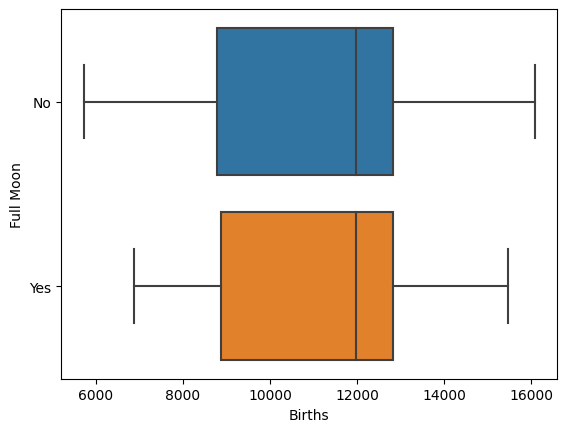

In [42]:
# It doesn't look like there's a big difference between full moon days and other days, 
# but small differences can be significant - let's look at distributions with boxplots and histograms

sns.boxplot(babymoons_df, x='Births', y='Full Moon')

There is a slightly wider range of births on non-full moon days, but they do not look very different.

[Text(0.5, 1.0, 'All Births')]

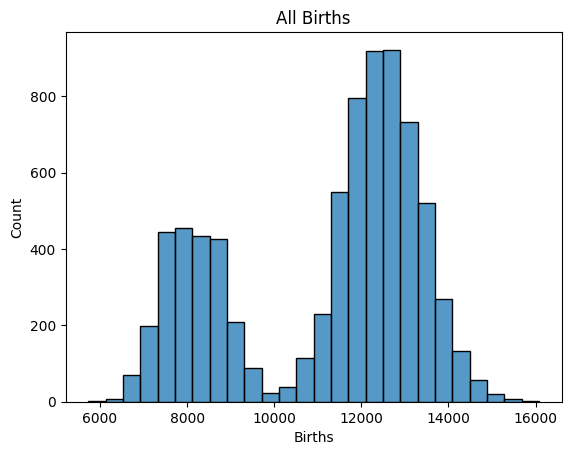

In [54]:
# Look at overall distribution of births

sns.histplot(babymoons_df, x='Births').set(title="All Births")

[Text(0.5, 1.0, 'Full Moon Births')]

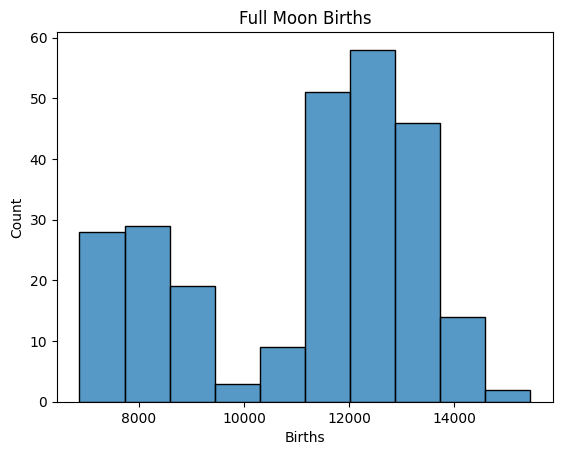

In [57]:
sns.histplot(data=babymoons_df[babymoons_df["Full Moon"]=="Yes"], x='Births').set(title="Full Moon Births")

[Text(0.5, 1.0, 'Non Full Moon Births')]

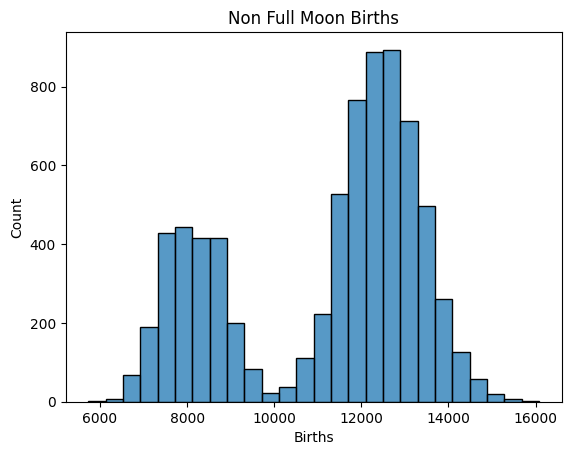

In [58]:
sns.histplot(data=babymoons_df[babymoons_df["Full Moon"]=="No"], x='Births').set(title="Non Full Moon Births")

The distributions all are roughly the same shape (bimodal). But since the distributions are bimodal, that means that our mean calculations are not accurately describing the center of the data, since there are really two centers.